<a href="https://colab.research.google.com/github/anvy87/AlgoTrading/blob/master/kc_pivotprice_intraday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kiteconnect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.1 MB/s eta 0:00:00


In [2]:
from kiteconnect import KiteConnect
import pandas as pd
import numpy as np
import logging
import os
import time
import datetime as dt
api_key = "1ll4p8ziqlk8hh7g"
api_secret = "x59r5u1vd25annfpgts22wv8ykfueirl"
kite = KiteConnect(api_key=api_key)

In [3]:
print(kite.login_url()) #use this url to manually login and authorize yourself

https://kite.zerodha.com/connect/login?api_key=1ll4p8ziqlk8hh7g&v=3


In [8]:
#generate trading session
request_token = "iqYTJOq0OTJhN96wpCCWRkBaUSujQa2J" #Extract request token from the redirect url obtained after you authorize yourself by loggin in
data = kite.generate_session(request_token, api_secret=api_secret)
#create kite trading object
kite.set_access_token(data["access_token"])

In [4]:
#get dump of all NSE instruments
instrument_dump = kite.instruments("NSE")
instrument_df = pd.DataFrame(instrument_dump)
instrument_df.to_csv("NSE_Instruments.csv",index=False)

In [5]:
def instrumentLookup(instrument_df,symbol):
    """Looks up instrument token for a given script from instrument dump"""
    try:
        return instrument_df[instrument_df.tradingsymbol==symbol].instrument_token.values[0]
    except:
        return -1

In [6]:
def fetchOHLC(ticker,interval,duration):
  """extracts historcial data and outputs in the form of dataframe"""
  instrument = instrumentLookup(instrument_df,ticker)
  data = pd.DataFrame(kite.historical_data(instrument,dt.date.today()-dt.timedelta(duration),dt.date.today(),interval))
  data.set_index("date",inplace=True)
  return data

In [7]:
# List of Nifty 50 constituent trading symbols (update as per latest list)
nifty50_symbols = [
    "ADANIENT", "ADANIPORTS", "APOLLOHOSP", "ASIANPAINT", "AXISBANK", "BAJAJ-AUTO", "BAJAJFINSV", "BAJFINANCE", "BHARTIARTL",
    "BEL", "CIPLA", "COALINDIA", "DRREDDY", "EICHERMOT", "ETERNAL", "GRASIM", "HCLTECH", "HDFCBANK", "HDFCLIFE", "HEROMOTOCO",
    "HINDALCO", "HINDUNILVR", "ICICIBANK", "INDUSINDBK", "INFY", "ITC", "JIOFIN", "JSWSTEEL", "KOTAKBANK", "LT", "M&M", "MARUTI",
    "NESTLEIND", "NTPC", "ONGC", "POWERGRID", "RELIANCE", "SBILIFE", "SBIN", "SHRIRAMFIN", "SUNPHARMA", "TATACONSUM",
    "TATAMOTORS", "TATASTEEL", "TCS", "TECHM", "TITAN", "TRENT", "ULTRACEMCO", "WIPRO"]

In [ ]:
instrument_token = [6401, 40193, 60417, 81153, 98049, 119553, 177665, 225537, 315393, 341249, 345089, 348929, 408065, 424961, 492033, 502785, 519937,
 633601, 738561, 779521, 857857, 878593, 884737, 895745, 897537, 969473, 1270529, 1304833, 1346049, 1510401, 1850625, 2815745, 2939649,
 2952193, 2953217, 2977281, 3001089, 3465729, 4267265, 4268801, 4598529, 4644609, 5215745, 5582849, 3861249]

In [ ]:
for i in nifty50_symbols:
  df = fetchOHLC(i,"day", 30)
  df['SMA_20'] = df['close'].rolling(window=20).mean()
  #if df['close'] > df['SMA_20']:
  #print(df['SMA_20'])
  #print(i, df)
  if df['close'].iloc[-1] > df['SMA_20'].iloc[-1]:
    print(f"{i}: Latest Close Price ({df['close'].iloc[-1]:.2f}) is above the Latest 20-Day SMA ({df['SMA_20'].iloc[-1]:.2f})")

ASIANPAINT: Latest Close Price (2489.50) is above the Latest 20-Day SMA (2412.15)
EICHERMOT: Latest Close Price (5680.00) is above the Latest 20-Day SMA (5558.23)
ETERNAL: Latest Close Price (303.50) is above the Latest 20-Day SMA (294.26)
GRASIM: Latest Close Price (2751.00) is above the Latest 20-Day SMA (2744.43)
HDFCLIFE: Latest Close Price (758.70) is above the Latest 20-Day SMA (754.04)
HEROMOTOCO: Latest Close Price (4563.40) is above the Latest 20-Day SMA (4409.36)
HINDUNILVR: Latest Close Price (2492.10) is above the Latest 20-Day SMA (2491.09)
ITC: Latest Close Price (415.70) is above the Latest 20-Day SMA (415.25)
JIOFIN: Latest Close Price (324.65) is above the Latest 20-Day SMA (320.90)
JSWSTEEL: Latest Close Price (1052.70) is above the Latest 20-Day SMA (1039.98)
LT: Latest Close Price (3636.30) is above the Latest 20-Day SMA (3545.68)
MARUTI: Latest Close Price (12529.00) is above the Latest 20-Day SMA (12499.70)
SBILIFE: Latest Close Price (1840.40) is above the Latest

In [ ]:
#instrument_token = 738561  # RELIANCE
for i in instrument_token:
  historical_data = kite.historical_data(
      i,
      from_date="2025-06-20",
      to_date="2025-08-04",
      interval="day"
      )
  df = pd.DataFrame(historical_data)
df['SMA_20'] = df['close'].rolling(window=20).mean()

# Latest SMA value:
print(df.iloc[-1]['SMA_20'])

1418.58


# **placing order**

In [ ]:
def placeMarketOrder(symbol, buy_sell, quantity):
  # place intraday market order on NSE
  if buy_sell == "buy":
    t_type = kite.TRANSACTION_TYPE_BUY
  elif buy_sell == "sell":
    t_type = kite.TRANSACTION_TYPE_SELL
  kite.place_order(tradingsymbol=symbol,
                   exchange=kite.EXCHANGE_NSE,
                   transaction_type=t_type,
                   quantity=quantity,
                   order_type=kite.ORDER_TYPE_MARKET,
                   product=kite.PRODUCT_CNC,
                   variety=kite.VARIETY_REGULAR)

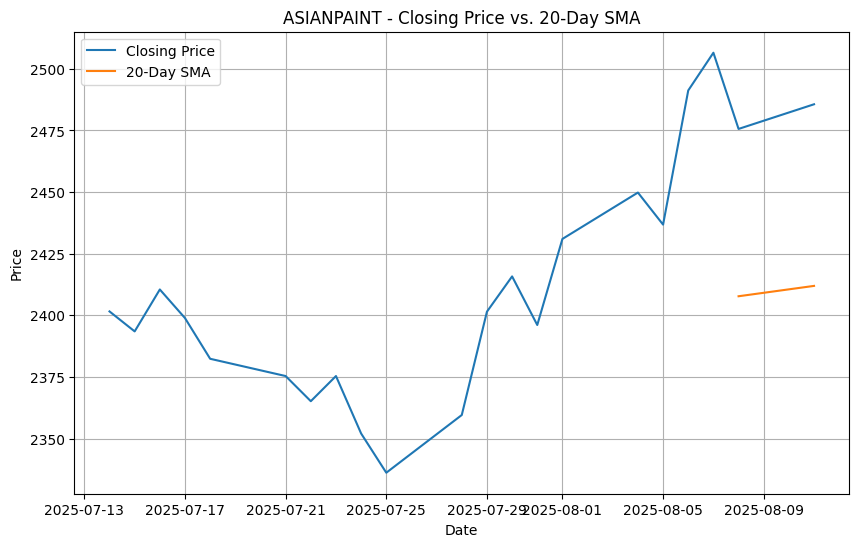

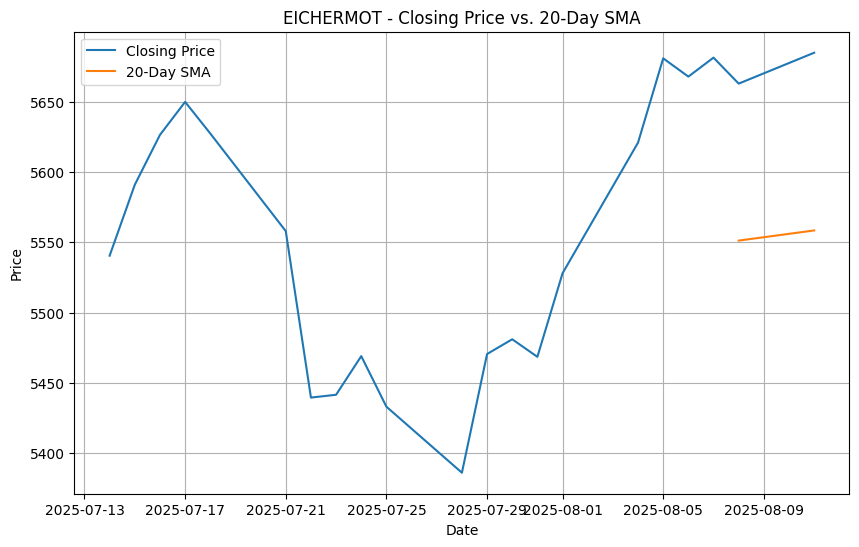

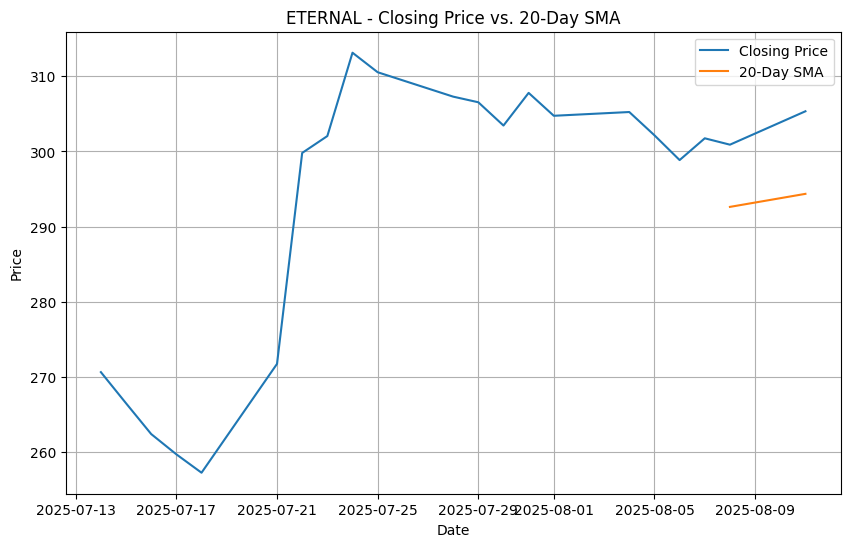

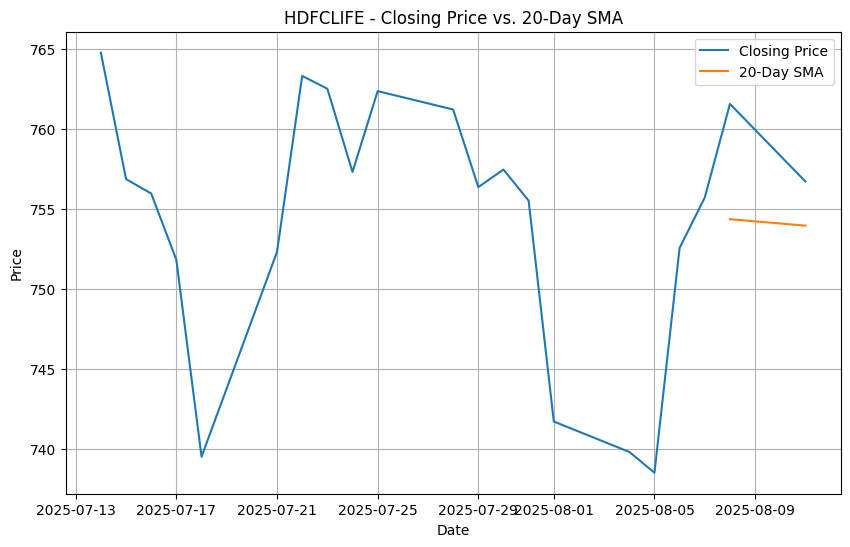

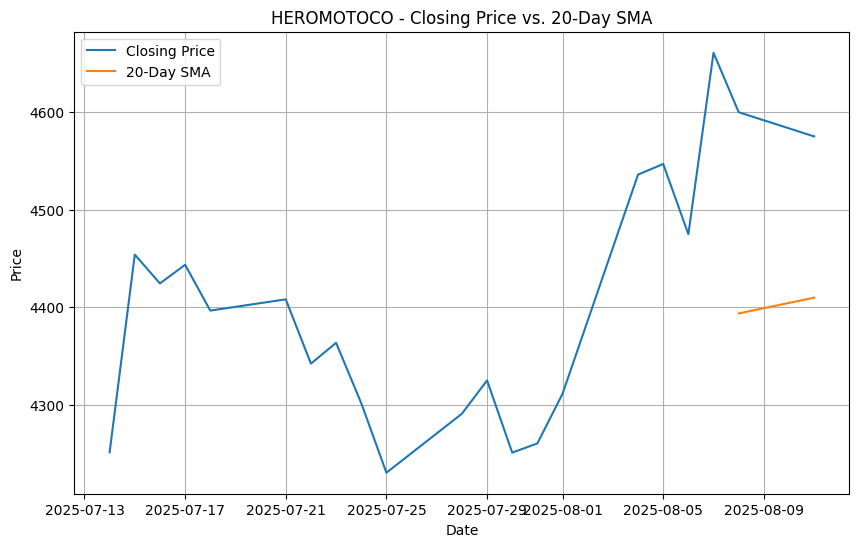

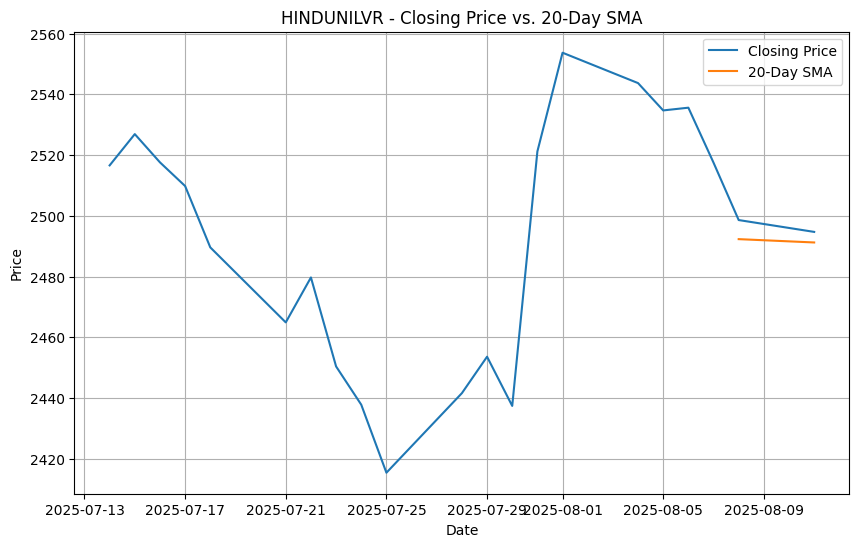

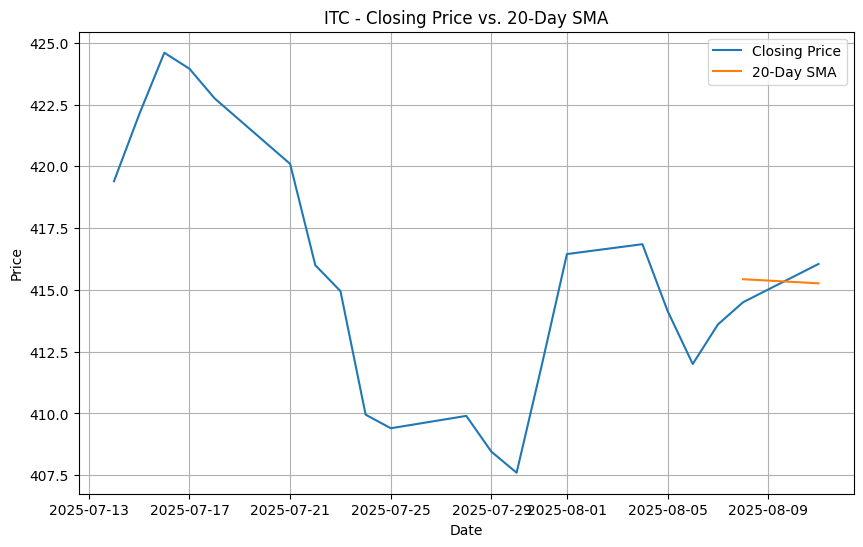

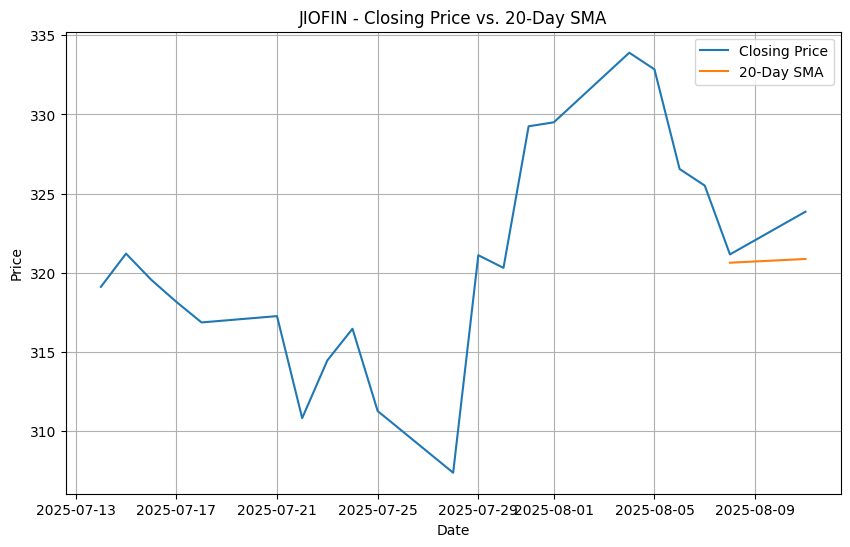

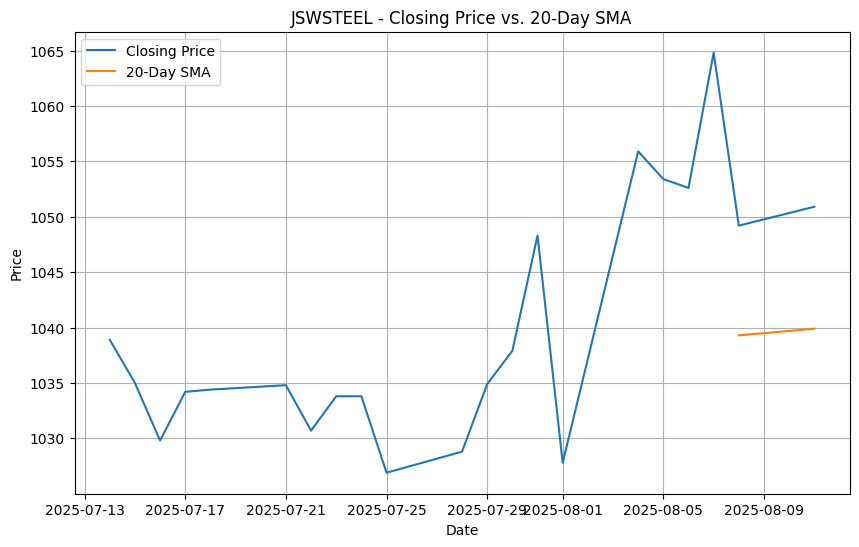

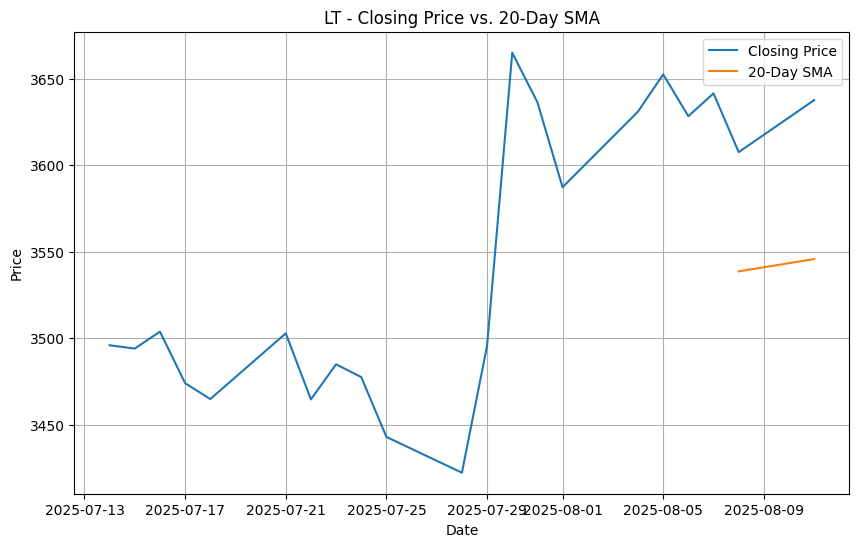

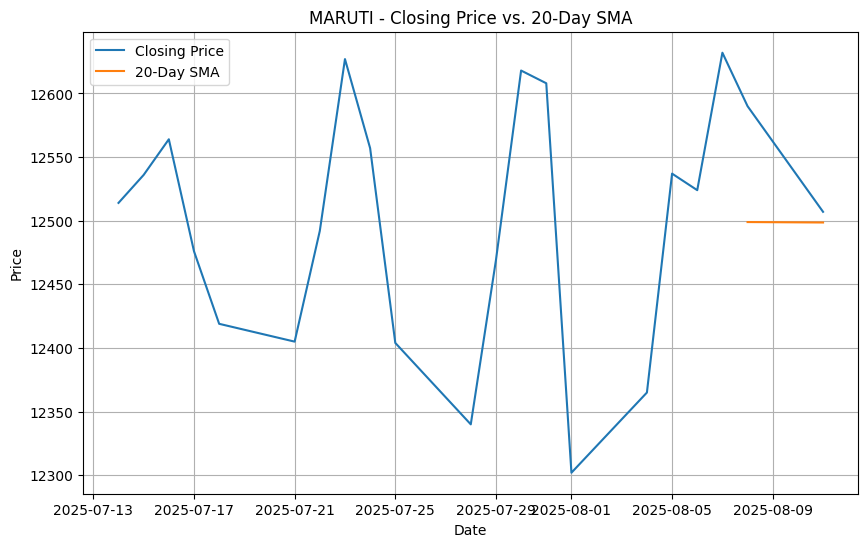

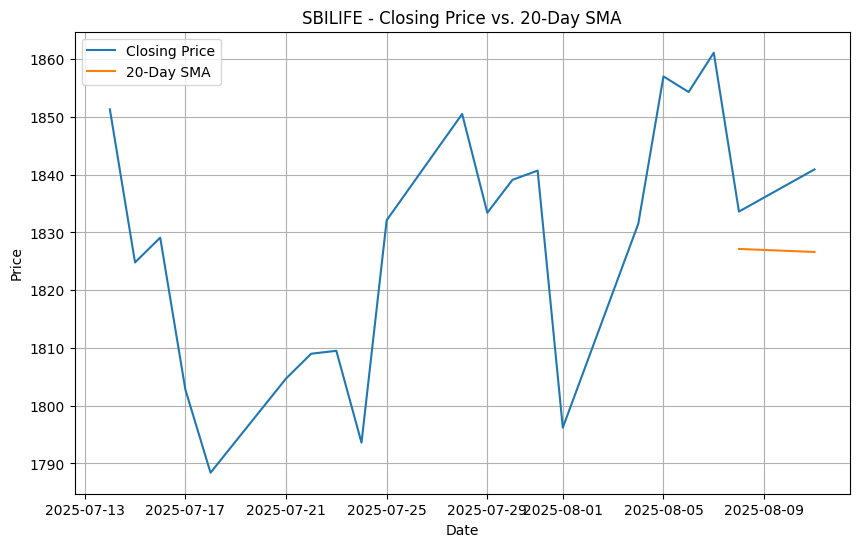

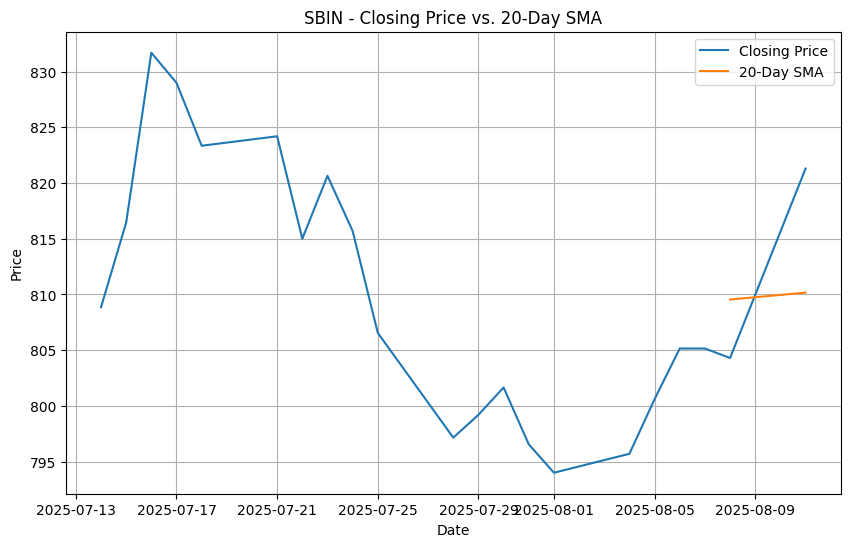

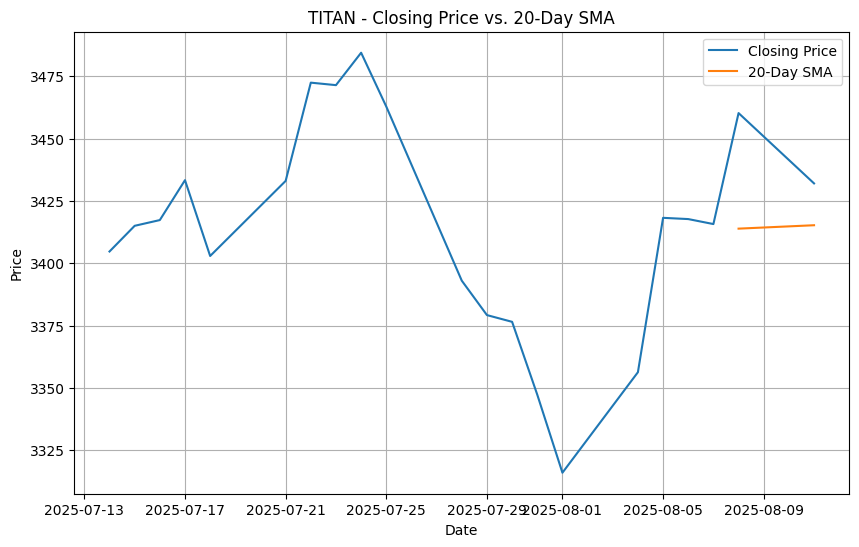

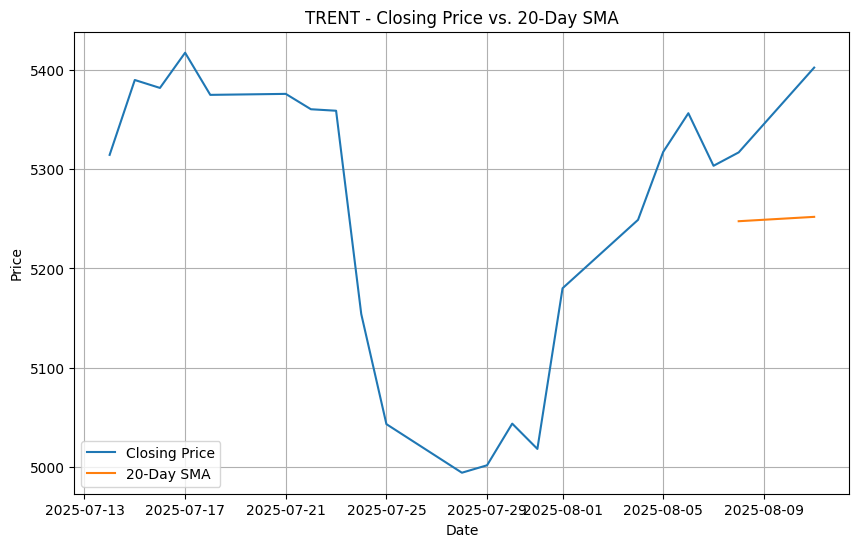

In [ ]:
import matplotlib.pyplot as plt

for i in nifty50_symbols:
  df = fetchOHLC(i,"day", 30)
  df['SMA_20'] = df['close'].rolling(window=20).mean()
  if df['close'].iloc[-1] > df['SMA_20'].iloc[-1]:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['close'], label='Closing Price')
    plt.plot(df.index, df['SMA_20'], label='20-Day SMA')
    plt.title(f'{i} - Closing Price vs. 20-Day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Set the quantity for each order
order_quantity = 1 # You can change this quantity as needed

for i in nifty50_symbols:
  df = fetchOHLC(i,"day", 30)
  df['SMA_20'] = df['close'].rolling(window=20).mean()
  if df['close'].iloc[-1] > df['SMA_20'].iloc[-1]:
    print(f"Generating buy signal for {i}")

    # Uncomment the line below to place a live market order
    #placeMarketOrder(i, "buy", order_quantity)

Generating buy signal for ASIANPAINT
Generating buy signal for EICHERMOT
Generating buy signal for ETERNAL
Generating buy signal for GRASIM
Generating buy signal for HDFCLIFE
Generating buy signal for HEROMOTOCO
Generating buy signal for HINDUNILVR
Generating buy signal for ITC
Generating buy signal for JIOFIN
Generating buy signal for JSWSTEEL
Generating buy signal for LT
Generating buy signal for MARUTI
Generating buy signal for SBILIFE
Generating buy signal for SBIN
Generating buy signal for TITAN
Generating buy signal for TRENT
